<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Dog-vs-Cat-Classification-using-Transfer-Learning/blob/main/Dog_vs_Cat_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Transfer Learning?

(TL is a Deep Learning technique where we use a Pre-trained model.)

[Can be use similar task/Smaller Dataset]

Transfer learning is a technique in machine learning where a model trained on one task is used as the starting point for a model on a second task. This can be useful when the second task is similar to the first task, or when there is limited data available for the second task. By using the learned features from the first task as a starting point, the model can learn more quickly and effectively on the second task. This can also help to prevent overfitting, as the model will have already learned general features that are likely to be useful in the second task.

Install Kaggle

In [1]:
!pip install kaggle


In [2]:
# configureing the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:06<00:00, 147MB/s]
100% 812M/812M [00:07<00:00, 121MB/s]


In [4]:
# extracting the dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# extracting the train.zip file
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The train.zip file is extracted')

The train.zip file is extracted


In [6]:
import os

# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing name of the images

In [7]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.12186.jpg', 'cat.4020.jpg', 'dog.2944.jpg', 'cat.712.jpg', 'dog.10185.jpg', 'cat.9081.jpg', 'dog.2498.jpg', 'cat.6300.jpg', 'dog.10970.jpg', 'dog.631.jpg', 'dog.6846.jpg', 'dog.887.jpg', 'dog.9895.jpg', 'cat.1217.jpg', 'dog.2448.jpg', 'dog.11236.jpg', 'dog.8195.jpg', 'cat.2719.jpg', 'cat.11024.jpg', 'dog.3491.jpg', 'dog.9859.jpg', 'dog.1613.jpg', 'dog.4900.jpg', 'dog.863.jpg', 'cat.4688.jpg', 'dog.3404.jpg', 'cat.10932.jpg', 'cat.3599.jpg', 'cat.10309.jpg', 'dog.8662.jpg', 'cat.3485.jpg', 'dog.9340.jpg', 'dog.10611.jpg', 'cat.2238.jpg', 'cat.7155.jpg', 'cat.6215.jpg', 'dog.9304.jpg', 'cat.7111.jpg', 'dog.1309.jpg', 'dog.11537.jpg', 'dog.3737.jpg', 'dog.8428.jpg', 'dog.8058.jpg', 'cat.1558.jpg', 'cat.173.jpg', 'dog.5430.jpg', 'cat.10373.jpg', 'dog.941.jpg', 'cat.7011.jpg', 'dog.4322.jpg', 'dog.4915.jpg', 'dog.5290.jpg', 'dog.11692.jpg', 'dog.8239.jpg', 'cat.5864.jpg', 'cat.3665.jpg', 'dog.10238.jpg', 'dog.11609.jpg', 'cat.4446.jpg', 'cat.2869.jpg', 'cat.2489.jpg', 'dog.5619.jpg', 

Importing the dependanices

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

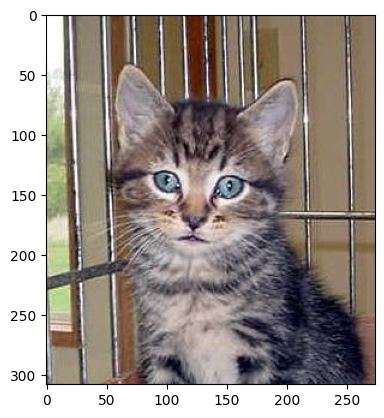

In [9]:
# display cat image
img = mpimg.imread('/content/train/cat.6621.jpg')
plt.imshow(img)

In [10]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [11]:
# creating a directory for resized images
os.mkdir('/content/resized images')

In [12]:
original_folder = '/content/train/'
resized_folder = '/content/resized images/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_image_path = resized_folder+filename
  img.save(new_image_path)

In [13]:
# display resized cat image
img = mpimg.imread('/content/resized images')
imgplt = plt.imshow(img)
plt.show()

IsADirectoryError: [Errno 21] Is a directory: '/content/resized images'

In [ ]:
# display resized dog image
img = mpimg.imread('/content/resized images/dog.2498.jpg')
plt.imshow(img)

Creating labels for resized images of dogs and cats

cat --> 0

dog --> 1

In [14]:
# creating a for loop to assing the labels

filename = os.listdir('/content/resized images')

labels = []

for i in range(2000):

  file_name = filename[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [15]:
print(filename[0:5])
print(len(filename))

['dog.12186.jpg', 'cat.4020.jpg', 'dog.2944.jpg', 'cat.712.jpg', 'dog.10185.jpg']
2000


In [16]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [17]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


Converting all the resized images to numpy arrays

In [18]:
import cv2
import glob

In [19]:
image_directory = '/content/resized images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory+ '*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [20]:
print(dog_cat_images)

[[[[131 138 157]
   [124 131 150]
   [110 114 132]
   ...
   [ 25  64 108]
   [ 35  77 120]
   [ 27  69 112]]

  [[117 124 143]
   [123 130 147]
   [111 115 133]
   ...
   [ 22  61 105]
   [ 30  72 115]
   [ 21  63 106]]

  [[115 122 139]
   [121 128 143]
   [117 122 137]
   ...
   [ 18  57 101]
   [ 24  66 109]
   [ 17  59 102]]

  ...

  [[ 77 117 170]
   [ 79 121 174]
   [ 90 132 185]
   ...
   [103 147 201]
   [106 147 202]
   [ 94 134 187]]

  [[ 70 112 165]
   [ 86 128 181]
   [ 89 131 184]
   ...
   [109 153 207]
   [118 159 214]
   [ 94 135 190]]

  [[ 67 109 162]
   [ 89 131 184]
   [ 80 124 177]
   ...
   [ 88 133 190]
   [ 99 140 195]
   [ 69 110 165]]]


 [[[ 78  64   0]
   [ 84  70   0]
   [ 90  75   6]
   ...
   [ 86  73   0]
   [ 86  73   0]
   [ 91  78   2]]

  [[ 79  65   0]
   [ 84  70   0]
   [ 90  75   6]
   ...
   [ 90  77   1]
   [ 89  76   0]
   [ 92  79   3]]

  [[ 81  67   0]
   [ 86  72   0]
   [ 90  75   6]
   ...
   [ 94  81   7]
   [ 93  80   6]
   [ 94  81

In [21]:
type(dog_cat_images)

numpy.ndarray

In [22]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [23]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [26]:
# scaling the data

X_train_scailed = X_train/255
X_test_scailed = X_test/255

In [34]:
print(X_train_scailed)

[[[[0.29803922 0.46666667 0.5254902 ]
   [0.29803922 0.46666667 0.5254902 ]
   [0.31372549 0.47058824 0.54117647]
   ...
   [0.91372549 0.89019608 0.81568627]
   [0.94901961 0.92156863 0.85490196]
   [0.96470588 0.94901961 0.87843137]]

  [[0.30196078 0.47058824 0.52941176]
   [0.30588235 0.4745098  0.53333333]
   [0.31764706 0.4745098  0.54509804]
   ...
   [0.92156863 0.89803922 0.82352941]
   [0.95686275 0.92941176 0.8627451 ]
   [0.97254902 0.95686275 0.88627451]]

  [[0.30980392 0.47843137 0.5372549 ]
   [0.31372549 0.48235294 0.54117647]
   [0.3254902  0.48235294 0.55294118]
   ...
   [0.92941176 0.90588235 0.83137255]
   [0.96470588 0.9372549  0.87058824]
   [0.98039216 0.96470588 0.89411765]]

  ...

  [[0.06666667 0.08235294 0.0627451 ]
   [0.05490196 0.07058824 0.05098039]
   [0.03921569 0.05098039 0.04313725]
   ...
   [0.8        0.77254902 0.6745098 ]
   [0.80392157 0.76862745 0.6627451 ]
   [0.8        0.76470588 0.65882353]]

  [[0.05490196 0.07058824 0.05098039]
   [0.0

Building the CNN

In [27]:
import tensorflow as tf
import tensorflow_hub as hub


In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [29]:
num_of_classes =2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [30]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [31]:
model.fit(X_train_scailed, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 8s 42ms/step - loss: 0.1635 - acc: 0.9388
Epoch 2/5
50/50 [==============================] - 2s 43ms/step - loss: 0.0587 - acc: 0.9837
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0429 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0334 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0285 - acc: 0.9937


In [33]:
score, acc = model.evaluate(X_test_scailed, Y_test)
print('Test Loss =',score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 45ms/step - loss: 0.0584 - acc: 0.9700
Test Loss = 0.05836782604455948
Test Accuracy = 0.9700000286102295


Predictive System

Path of the image to be predicted: /content/images.jpeg


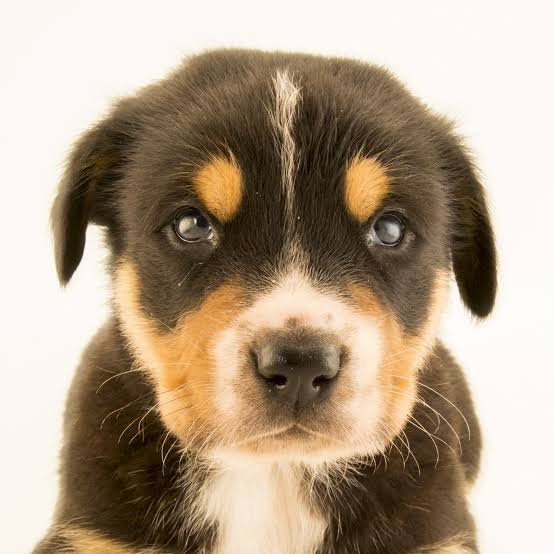

1/1 [==============================] - 2s 2s/step
[[-2.92131    1.9959406]]
1
The image represents a Dog


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


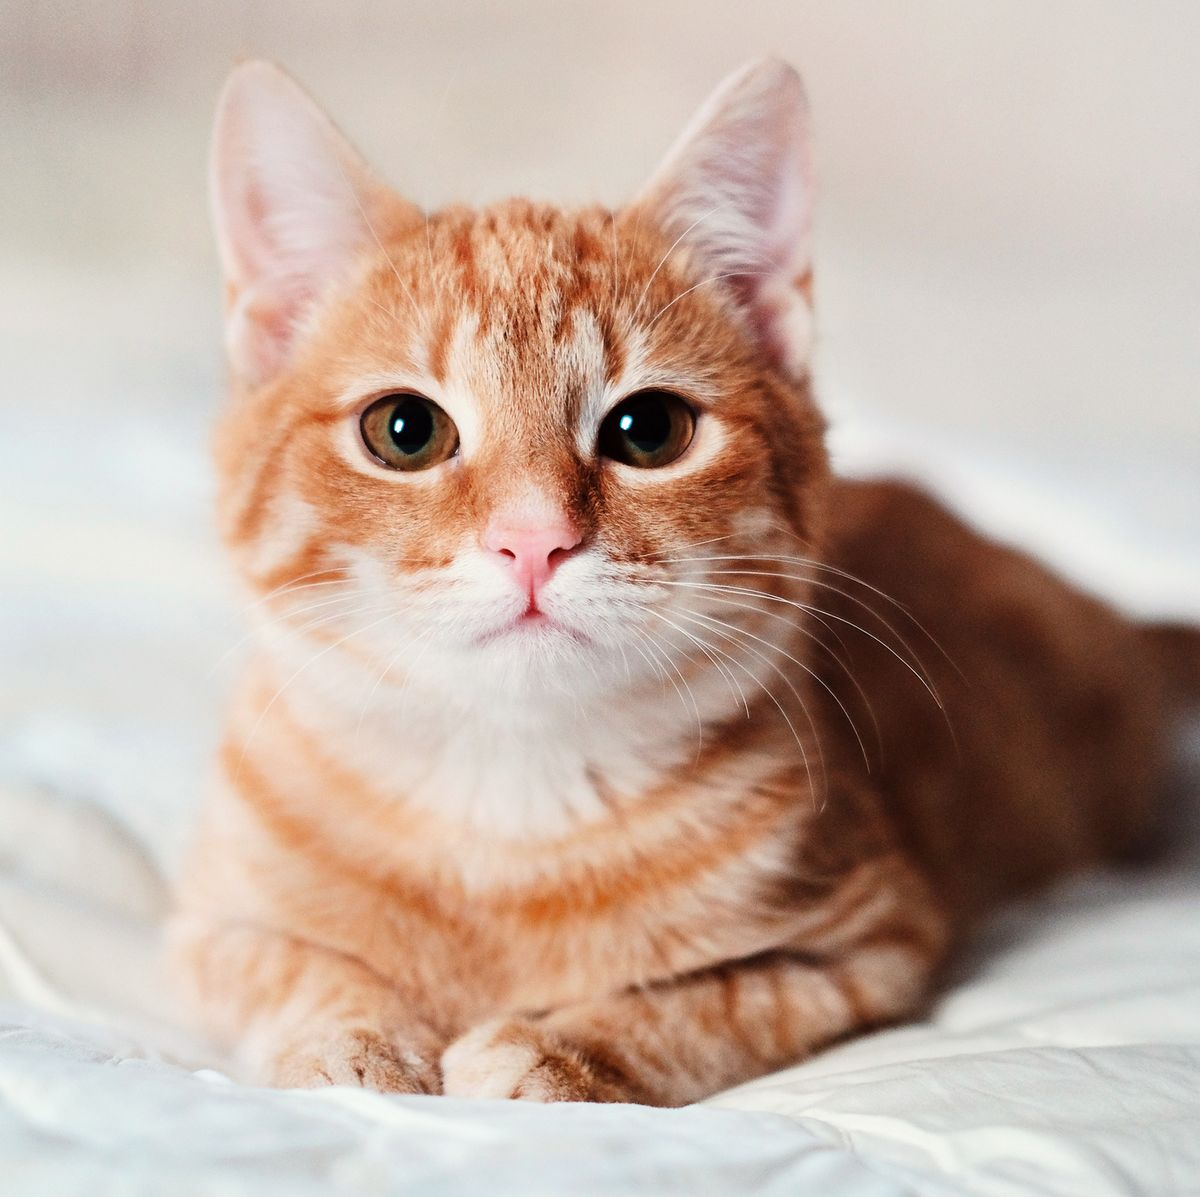

1/1 [==============================] - 0s 31ms/step
[[ 4.85016   -5.2703786]]
0
The image represents a Cat


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')